# 1. SETUP ENV

In [2]:
!pip install pandas==2.2.2 faker==36.1.1 openai==1.65.3 python-dotenv seaborn

In [3]:
from google.colab import drive
import os


# This will prompt you for authorization and mount your Google Drive.
drive.mount('/content/drive')


def get_notebook_and_folder_path(notebook_name):
    """Finds the full path and the containing folder path for a given notebook name."""
    root_path = '/content/drive/My Drive'

    def find_notebook_path(root, name):
        """Searches recursively for the notebook name in the specified root directory."""
        for root_dir, _, files in os.walk(root):
            if name in files:
                return os.path.join(root_dir, name)
        return None


    # Locate the notebook file
    notebook_path = find_notebook_path(root_path, notebook_name)


    if notebook_path:
        folder_path = notebook_path.rsplit('/', 1)[0] + '/'
        return folder_path
    else:
        return None, "Notebook not found."


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. GENERATE FAKE DATA - Customer Demographics

## 2.A. **Customer Demographics** – simulates personal details for a set of customers.

### Customer Demographics Table - Data Dictionary

| Field Name       | Data Type  | Example Value                | Description                                                                                     |
|------------------|------------|------------------------------|-------------------------------------------------------------------------------------------------|
| customer_id      | String     | `CUST_123456`                | Unique identifier for the customer. Used to join with chatbot sessions.                        |
| first_name       | String     | `John`                       | Customer’s first name.                                                                         |
| last_name        | String     | `Doe`                        | Customer’s last name.                                                                          |
| full_name        | String     | `John Doe`                   | Combined first and last name for readability.                                                  |
| email            | String     | `john.doe@example.com`       | Customer’s email address.                                                                      |
| phone_number     | String     | `555-123-4567`               | Customer’s phone number.                                                                       |
| address          | String     | `123 Main St, Apt 4`         | Street address (potentially with apartment/unit).                                              |
| city             | String     | `Denver`                     | City of residence.                                                                             |
| state            | String     | `CO`                         | State or province.                                                                             |
| zip_code         | String     | `80203`                      | ZIP/postal code.                                                                               |
| age              | Integer    | `35`                         | Age in years (randomized range).                                                               |
| race             | String     | `Hispanic or Latino`         | Chosen from a predefined list (e.g., White, Black or African American, Asian, etc.).           |
| gender           | String     | `Female`                     | Chosen from a list (Male, Female, Other, Prefer not to say).                                   |
| occupation_type  | String     | `Employed Full-time`         | General occupation category (e.g., Student, Retired, Self-employed).                           |
| education        | String     | `Bachelor`                   | Education level (High School, Bachelor, etc.).                                                |
| income           | Integer    | `65000`                      | Annual income in USD (random range, e.g., 30,000 – 150,000).                                   |
| marriage_status  | String     | `Single`                     | Relationship status (Single, Married, Divorced, etc.).                                         |
| homeowner        | Boolean    | `False`                      | True if the customer owns a home, false otherwise.                                             |


In [7]:
## FUNCTION TO GENERATE FAKE CUST DATA
import pandas as pd
import random
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

def generate_fake_customer_demographics(num_customers=20, seed=42):
    """
    Generate a fake dataset of customer demographic information,
    including extended fields useful for segmentation.
    Returns a Pandas DataFrame.
    """
    # SEEDING for reproducibility
    random.seed(seed)
    np.random.seed(seed)
    Faker.seed(seed)

    fake = Faker()

    # Possible values for demographic fields
    races = [
        "White", "Black or African American", "Asian",
        "Hispanic or Latino", "Other"
    ]
    genders = [
        "Male", "Female", "Other", "Prefer not to say"
    ]
    occupation_types = [
        "Unemployed", "Student", "Retired",
        "Employed Full-time", "Employed Part-time",
        "Self-employed"
    ]
    education_levels = [
        "High School", "Associate", "Bachelor",
        "Master", "Doctorate", "Other"
    ]
    marriage_statuses = [
        "Single", "Married", "Divorced",
        "Widowed", "Separated"
    ]

    data_rows = []

    for _ in range(num_customers):
        customer_id = f"CUST_{fake.random_int(min=100000, max=999999)}"
        first_name = fake.first_name()
        last_name = fake.last_name()
        full_name = f"{first_name} {last_name}"
        email = fake.email()
        phone_number = fake.phone_number()
        address = fake.address().replace("\n", ", ")
        city = fake.city()
        state = fake.state()
        zip_code = fake.zipcode()

        age = random.randint(18, 90)
        race = random.choice(races)
        gender = random.choice(genders)
        occupation_type = random.choice(occupation_types)
        education = random.choice(education_levels)
        income = random.randint(30000, 150000)  # Annual income range in USD
        marriage_status = random.choice(marriage_statuses)
        homeowner = random.choice([True, False])

        row = {
            "customer_id": customer_id,
            "first_name": first_name,
            "last_name": last_name,
            "full_name": full_name,
            "email": email,
            "phone_number": phone_number,
            "address": address,
            "city": city,
            "state": state,
            "zip_code": zip_code,
            "age": age,
            "race": race,
            "gender": gender,
            "occupation_type": occupation_type,
            "education": education,
            "income": income,
            "marriage_status": marriage_status,
            "homeowner": homeowner
        }
        data_rows.append(row)

    # Convert to DataFrame
    df_customers = pd.DataFrame(data_rows)
    return df_customers


In [8]:
#Use function to create customer data
customer_df = generate_fake_customer_demographics(num_customers=20, seed=42)

print(customer_df.shape)

customer_df.head()

(20, 18)


,customer_id,first_name,last_name,full_name,email,phone_number,address,city,state,zip_code,age,race,gender,occupation_type,education,income,marriage_status,homeowner
0,CUST_770487,Daniel,Figueroa,Daniel Figueroa,jeffreydoyle@example.net,001-581-896-0013x3890,"26542 Susan Junction Apt. 161, Melanieview, AS...",Herrerafurt,Colorado,72858,32,White,Other,Student,Associate,48289,Single,True
1,CUST_407419,Maria,Montgomery,Maria Montgomery,barbara10@example.net,441.731.6475,"192 Frank Light Suite 835, East Lydiamouth, MO...",East Robinshire,Virginia,41746,72,White,Male,Unemployed,Associate,60495,Separated,True
2,CUST_322955,Diana,Foster,Diana Foster,ithomas@example.org,001-388-249-6965x3287,"269 Paul Ranch, Riceside, VI 02005",Lake Nicoleview,Wyoming,84513,89,Black or African American,Prefer not to say,Student,Master,107236,Divorced,True
3,CUST_456699,Daniel,Graham,Daniel Graham,usmith@example.net,282-781-4893x252,"4303 Christopher Oval, Port Amandaberg, DC 86975",Arroyoburgh,Kentucky,69664,38,Hispanic or Latino,Other,Retired,Associate,58221,Divorced,True
4,CUST_736059,Rodney,Lewis,Rodney Lewis,jenniferross@example.net,+1-557-587-1331x5098,"10518 Joshua Oval, New David, FM 75348",Sanchezfort,Nebraska,25458,29,Hispanic or Latino,Male,Retired,Bachelor,109131,Divorced,True


# 3. GENERATE FAKE DATA - Chatbot Sessions JSONS

## 3.A. **Chatbot Sessions** – simulates IVR chatbot interactions (e.g., call logs, user intents, session outcomes).

- We'll create a class that encapsulates all the functionality for generating fake IVR session data.

###  Chatbot Sessions - Data Dictionary

| Field Name              | Data Type       | Example Value                             | Description                                                                                 |
|-------------------------|-----------------|-------------------------------------------|---------------------------------------------------------------------------------------------|
| session_id             | String          | `IVR-20230615-12345`                     | Unique ID for each IVR chatbot session.                                                     |
| customer_id            | String          | `CUST_123456`                             | Corresponds to an entry in the customer demographics table.                                |
| call_start_time        | DateTime        | `2023-06-15 10:23:45`                     | Timestamp when the session starts.                                                          |
| call_end_time          | DateTime        | `2023-06-15 10:29:53`                     | Timestamp when the session ends.                                                            |
| call_duration_sec      | Integer         | `368`                                     | Duration in seconds.                                                                        |
| initial_intent         | String          | `Billing Inquiry`                         | First recognized reason for the call.                                                       |
| final_intent           | String          | `Payment Arrangement Request`             | Final recognized intent if it changed during conversation.                                  |
| intent_confidence      | Float (0.0–1.0) | `0.85`                                    | AI model’s confidence level in recognizing the final intent.                                |
| resolution_status      | String          | `Resolved`                                | Outcome: Resolved, Escalated, or Abandoned.                                                 |
| escalation_flag        | Boolean         | `False`                                   | True if the session escalated to a live agent.                                              |
| escalation_reason      | String          | `Complex Issue`                           | Why it escalated (e.g., system error, complex request).                                     |
| customer_sentiment     | String          | `Positive`                                | Overall sentiment (Positive, Neutral, Negative).                                            |
| num_ivr_prompts        | Integer         | `4`                                       | Number of prompts or messages the IVR presented to the customer.                            |
| num_customer_utterances| Integer         | `3`                                       | How many times the customer responded or spoke.                                             |
| self_service_completion| Boolean         | `True`                                    | True if the customer’s issue was resolved without transferring to an agent.                 |
| topic_category         | String          | `Edge`                                    | Flags whether the topic is a “Common” or “Edge” scenario.                                   |
| ivr_outcome_code       | String          | `BILL-RES`                                | Internal code for how the call was resolved (e.g., billing resolved).                       |
| system_error_flag      | Boolean         | `False`                                   | Indicates if any system-related errors occurred during the session.                         |
| transcript_snippet     | String (Text)   | `User asking about payment plan options`  | A short excerpt capturing a piece of the conversation.                                      |
| audio_file_path        | String          | `s3://fake-call-recordings/2023/06/IVR...`| Reference to where the audio is stored (if applicable).                                     |


In [9]:
import os
import random
import time
import json
import logging
from datetime import datetime, timedelta
from typing import Dict, List, Any, Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from openai import OpenAI

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Load environment variables
load_dotenv()

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Configure plotting style
#plt.style.use('seaborn')
sns.set_palette("husl")

In [10]:
import os
import json
import random
import time
from datetime import datetime, timedelta
from typing import Dict, List, Any, Optional

import pandas as pd
import matplotlib.pyplot as plt

# This is the class object to create the session JSONs

class FakeSessionDataGenerator:
    """A class for generating synthetic IVR chatbot session data.

    This class provides functionality to generate realistic customer service interactions
    using OpenAI's GPT API. It simulates various scenarios, intents, and outcomes that
    might occur in a real IVR system.
    """

    def __init__(self, openai_api_key: str, gpt_model: str = "gpt-4", random_seed: int = 72):
        """Initialize the fake session data generator.

        Args:
            openai_api_key (str): OpenAI API key
            gpt_model (str): GPT model to use (default: gpt-4)
            random_seed (int): Seed for random number generator (default: 72)
        """
        self.client = OpenAI(api_key=openai_api_key)
        self.gpt_model = gpt_model
        self.random_seed = random_seed
        random.seed(self.random_seed)

        # Configuration
        self.max_tokens = 1000
        self.temperature = 0.7

        # Load intent categories and other configurations
        self._load_configurations()

        # Initialize statistics tracking
        self.stats = {
            'total_sessions': 0,
            'avg_duration': 0,
            'intent_distribution': {},
            'resolution_distribution': {},
            'sentiment_distribution': {}
        }

    @staticmethod
    def weighted_choice(weight_dict: dict) -> str:
        """Select a key from weight_dict based on its weight."""
        total = sum(weight_dict.values())
        r = random.uniform(0, total)
        upto = 0
        for key, weight in weight_dict.items():
            upto += weight
            if upto >= r:
                return key
        return key  # fallback

    def _load_configurations(self):
        """Load all configuration settings."""
        # Intent categories
        self.common_intents = [
            "Billing Inquiry", "Upgrade Request", "Technical Issue",
            "Payment Arrangement", "General Question", "Service Outage",
            "Cancellation Request", "Equipment Return/Pickup",
            "Account Information Update", "Bundle & Promotion Inquiry"
        ]

        self.edge_case_intents = [
            "Physical Line Damage", "Extreme Weather Failure",
            "Account Hijacking/Fraud", "Network Congestion Event",
            "Legacy Equipment Issue", "Accessibility Support",
            "International Roaming Error", "Overlapping Account Merger",
            "Suspicious Activity Alert", "Unmapped Address Error"
        ]

        # Probability weights for intent selection
        self.intent_weights = {"common": 0.8, "edge_case": 0.2}

        # Resolution status weights
        self.resolution_statuses_weights = {"Resolved": 0.6, "Escalated": 0.3, "Abandoned": 0.1}

        # Sentiment weights based on resolution status
        self.sentiment_weights = {
            "Resolved": {"Positive": 0.7, "Neutral": 0.2, "Negative": 0.1},
            "Escalated": {"Positive": 0.1, "Neutral": 0.1, "Negative": 0.8},
            "Abandoned": {"Positive": 0.2, "Neutral": 0.4, "Negative": 0.4}
        }

        # Fallback list for sentiment
        self.sentiment_options = ["Positive", "Neutral", "Negative"]

        # Intent detection keywords
        self.intent_keywords = self._generate_intent_keywords()

    def _generate_intent_keywords(self) -> Dict[str, List[str]]:
        """Generate comprehensive keywords for intent detection."""
        return {
            "Billing Inquiry": [
                "bill", "payment", "charge", "cost", "price", "fee", "credit",
                "balance", "invoice", "statement", "due", "paid", "refund"
            ],
            "Upgrade Request": [
                "upgrade", "faster", "speed", "better", "plan", "package",
                "higher", "premium", "advanced", "more", "increase"
            ],
            "Technical Issue": [
                "not working", "slow", "problem", "issue", "error", "broken",
                "connection", "signal", "outage", "down", "fix", "repair"
            ],
            # Add more comprehensive keywords for other intents
        }

    def _update_statistics(self, session: Dict[str, Any]) -> None:
        """Update running statistics with new session data."""
        self.stats['total_sessions'] += 1

        new_avg = (
            (self.stats['avg_duration'] * (self.stats['total_sessions'] - 1) +
             session['call_duration_sec']) / self.stats['total_sessions']
        )
        self.stats['avg_duration'] = new_avg

        self.stats['intent_distribution'][session['initial_intent']] = \
            self.stats['intent_distribution'].get(session['initial_intent'], 0) + 1

        self.stats['resolution_distribution'][session['resolution_status']] = \
            self.stats['resolution_distribution'].get(session['resolution_status'], 0) + 1

        self.stats['sentiment_distribution'][session['customer_sentiment']] = \
            self.stats['sentiment_distribution'].get(session['customer_sentiment'], 0) + 1

    def generate_session_id(self) -> str:
        """Generate a unique session ID."""
        timestamp = datetime.now().strftime("%Y%m%d")
        random_num = random.randint(10000, 99999)
        return f"IVR-{timestamp}-{random_num}"

    def generate_customer_id(self) -> str:
        """Generate a unique customer ID."""
        return f"CUST_{random.randint(100000, 999999)}"

    def generate_timestamps(self, date_range: Optional[List[str]] = None) -> Dict[str, Any]:
        """Generate start and end timestamps for a session with weighted day and time-of-day.

        If date_range is provided, it should be a list with two strings representing start and end dates
        in the format "m/d/YYYY".
        """
        # Define time-of-day and day-of-week weights
        timeofday_weights = {"before 5pm": 0.3, "after 5pm": 0.7}
        dayofweek_weights = {"Mon": 0.1, "Tue": 0.1, "Wed": 0.1, "Thu": 0.1, "Fri": 0.2, "Sat": 0.2, "Sun": 0.2}

        if date_range is not None:
            start_date = datetime.strptime(date_range[0], "%m/%d/%Y")
            end_date = datetime.strptime(date_range[1], "%m/%d/%Y")
        else:
            start_date = datetime.now() - timedelta(days=30)
            end_date = datetime.now()

        candidate_dates = []
        current_date = start_date.date()
        while current_date <= end_date.date():
            candidate_dates.append(datetime.combine(current_date, datetime.min.time()))
            current_date += timedelta(days=1)

        weights = []
        for d in candidate_dates:
            day_str = d.strftime("%a")
            weights.append(dayofweek_weights.get(day_str, 0.1))
        chosen_date = random.choices(candidate_dates, weights=weights, k=1)[0]

        time_choice = self.weighted_choice(timeofday_weights)
        if time_choice == "before 5pm":
            random_seconds = random.randint(0, 61199)
        else:
            random_seconds = random.randint(61200, 86399)

        time_delta = timedelta(seconds=random_seconds)
        start_time = chosen_date + time_delta

        duration = random.randint(180, 900)
        end_time = start_time + timedelta(seconds=duration)

        return {
            "call_start_time": start_time.isoformat(),
            "call_end_time": end_time.isoformat(),
            "call_duration_sec": duration
        }

    def select_intent(self) -> str:
        """Select an intent based on probability weights."""
        if random.random() < self.intent_weights["common"]:
            return random.choice(self.common_intents)
        return random.choice(self.edge_case_intents)

    def detect_intent(self, text: str) -> Optional[str]:
        """Detect intent from customer message using keyword matching."""
        text_lower = text.lower()
        matched_intents = []
        for intent, keywords in self.intent_keywords.items():
            if any(keyword in text_lower for keyword in keywords):
                matched_intents.append(intent)
        if matched_intents:
            common_matches = [i for i in matched_intents if i in self.common_intents]
            if common_matches and random.random() < self.intent_weights["common"]:
                return random.choice(common_matches)
            return random.choice(matched_intents)
        return self.select_intent()

    def generate_conversation(self, initial_intent: str, resolution_status: str,
                              escalation_flag: bool, customer_sentiment: str,
                              system_error_flag: bool, topic_type: str, topic_name: str) -> List[Dict[str, Any]]:
        """Generate a conversation using OpenAI's API."""
        prompt = f"""Generate a realistic IVR chatbot conversation for Spectrum customer service with the following parameters:

Initial Customer Intent: {initial_intent}
Resolution Status: {resolution_status}
Escalation Required: {'Yes' if escalation_flag else 'No'}
Customer Sentiment: {customer_sentiment}
System Error Occurs: {'Yes' if system_error_flag else 'No'}
Topic Type: {topic_type}
Topic Name: {topic_name}

Requirements:
- Format: 'Chatbot: <message>' or 'Customer: <message>'
- Start with a Chatbot greeting.
- The customer's first response should indicate {initial_intent} with an emphasis on the {topic_name} topic.
- The dialogue should naturally convey a {customer_sentiment.lower()} sentiment.
- Ensure the conversation's flow reflects the resolution status. For example, if the status is 'Abandoned', include signs of frustration or a dropped call; if 'Escalated', indicate a handover to a human agent; if 'Resolved', show a clear resolution.
- {'Include system error and recovery' if system_error_flag else 'Normal operation'}
- {'Include escalation to human agent' if escalation_flag else 'Resolve in IVR'}
- End with a conversation that clearly exhibits a {resolution_status.lower()} outcome."""

        try:
            response = self.client.chat.completions.create(
                model=self.gpt_model,
                messages=[
                    {"role": "system", "content": "You are a Spectrum IVR chatbot simulator."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=self.max_tokens,
                temperature=self.temperature
            )
        except Exception as e:
            logging.error(f"Error generating conversation: {str(e)}")
            return []

        conversation_text = response.choices[0].message.content
        conversation_turns = []
        current_time = datetime.now()
        for line in conversation_text.strip().split('\n'):
            if not line.strip():
                continue
            current_time += timedelta(seconds=random.randint(5, 20))
            text = line.strip()
            if text.lower().startswith(("customer:", "customer (")):
                speaker = "Customer"
                text = text.split(":", 1)[1].strip()
                detected_intent = self.detect_intent(text)
                intent = {"intent_name": detected_intent, "confidence_score": random.uniform(0.7, 0.99)} if detected_intent else None
            elif text.lower().startswith(("chatbot:", "ivr:")):
                speaker = "Chatbot"
                text = text.split(":", 1)[1].strip()
                intent = None
            else:
                continue
            turn = {
                "turn_number": len(conversation_turns) + 1,
                "timestamp": current_time.isoformat() + "Z",
                "speaker": speaker,
                "text": text,
                "intent_detected": intent
            }
            conversation_turns.append(turn)
        return conversation_turns

    def generate_session(self, date_range: Optional[List[str]] = None) -> Dict[str, Any]:
        """Generate a single IVR chatbot session.

        Args:
            date_range (List[str], optional): A list containing two dates [start_date, end_date] in "m/d/YYYY" format.
        """
        initial_intent = self.select_intent()
        resolution_status = self.weighted_choice(self.resolution_statuses_weights)
        if resolution_status == "Escalated":
            escalation_flag = True
        else:
            escalation_flag = random.random() < 0.2
        customer_sentiment = self.weighted_choice(self.sentiment_weights[resolution_status])
        system_error_flag = random.random() < 0.05
        if initial_intent in self.common_intents:
            topic_type = "Common"
            topic_name = initial_intent
        else:
            topic_type = "Edge-Case"
            topic_name = initial_intent
        try:
            conversation = self.generate_conversation(
                initial_intent=initial_intent,
                resolution_status=resolution_status,
                escalation_flag=escalation_flag,
                customer_sentiment=customer_sentiment,
                system_error_flag=system_error_flag,
                topic_type=topic_type,
                topic_name=topic_name
            )
            session = {
                "session_id": self.generate_session_id(),
                "customer_id": self.generate_customer_id(),
                **self.generate_timestamps(date_range),
                "conversation": conversation,
                "initial_intent": initial_intent,
                "resolution_status": resolution_status,
                "escalation_flag": escalation_flag,
                "customer_sentiment": customer_sentiment,
                "system_error_flag": system_error_flag,
                "ivr_outcome_code": f"{topic_name.upper().replace(' ', '-')}",
                "topic_type": topic_type,
                "topic_name": topic_name
            }
            self._update_statistics(session)
            return session
        except Exception as e:
            logging.error(f"Error generating session: {str(e)}")
            return None

    def generate_multiple_sessions(self, num_sessions: int = 25,
                                   output_file: str = None,
                                   date_range: Optional[List[str]] = None) -> List[Dict[str, Any]]:
        """Generate multiple IVR chatbot sessions.

        Args:
            num_sessions (int): Number of sessions to generate
            output_file (str): Optional file path to save sessions. If not provided, a default file name will be used.
            date_range (List[str], optional): A list containing two dates [start_date, end_date] in "m/d/YYYY" format.

        Returns:
            List[Dict[str, Any]]: List of generated sessions
        """
        start_runtime = time.time()

        # Ensure output folder exists
        os.makedirs("session_batch_files", exist_ok=True)
        if output_file is None:
            output_file = os.path.join("session_batch_files", f"fake_ivr_sessions_batch{datetime.now().strftime('%Y%m%d_%H%M%S')}.json")
        else:
            output_file = os.path.join("session_batch_files", output_file)

        sessions = []
        for i in range(num_sessions):
            try:
                session = self.generate_session(date_range)
                if session:
                    sessions.append(session)
                    logging.info(f"Generated session {i+1}/{num_sessions}")
            except Exception as e:
                logging.error(f"Error generating session {i+1}: {str(e)}")

        try:
            with open(output_file, 'w') as f:
                json.dump(sessions, f, indent=2)
            logging.info(f"Saved {len(sessions)} sessions to {output_file}")
        except Exception as e:
            logging.error(f"Error saving sessions to file: {str(e)}")

        end_runtime = time.time()
        total_run_time = end_runtime - start_runtime
        execution_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        log_contents = f"""Total Script Run Time: {total_run_time:.2f} seconds
LLM Model: {self.gpt_model}
Random Seed: {self.random_seed}
Date Range: {date_range}
Total Session Count: {len(sessions)}
Execution Date: {execution_date}
Output Filename: {output_file}
"""
        os.makedirs("session_creation_logs", exist_ok=True)
        log_filename = os.path.join("session_creation_logs", f"logs_batch{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
        try:
            with open(log_filename, 'w') as log_file:
                log_file.write(log_contents)
            logging.info(f"Log file created: {log_filename}")
        except Exception as e:
            logging.error(f"Error saving log file: {str(e)}")

        return sessions

    def get_statistics(self) -> Dict[str, Any]:
        """Get current statistics about generated sessions."""
        return self.stats

    def plot_statistics(self) -> None:
        """Plot various statistics about the generated sessions."""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Session Generation Statistics', fontsize=16)

        intent_df = pd.DataFrame.from_dict(self.stats['intent_distribution'], orient='index', columns=['count'])
        intent_df.plot(kind='bar', ax=axes[0,0], title='Intent Distribution')
        axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

        resolution_df = pd.DataFrame.from_dict(self.stats['resolution_distribution'], orient='index', columns=['count'])
        resolution_df.plot(kind='pie', y='count', ax=axes[0,1], title='Resolution Distribution', autopct='%1.1f%%')

        sentiment_df = pd.DataFrame.from_dict(self.stats['sentiment_distribution'], orient='index', columns=['count'])
        sentiment_df.plot(kind='bar', ax=axes[1,0], title='Sentiment Distribution')

        axes[1,1].axis('off')
        summary_text = f"Total Sessions: {self.stats['total_sessions']}\nAverage Duration: {self.stats['avg_duration']:.2f} seconds"
        axes[1,1].text(0.1, 0.5, summary_text, fontsize=12)

        plt.tight_layout()
        plt.show()


In [12]:
# Initialize the generator
generator = FakeSessionDataGenerator(
    openai_api_key=OPENAI_API_KEY,  #os.getenv("OPENAI_API_KEY"),
    gpt_model="gpt-4o",
    random_seed=1
)

generator

In [13]:
#Use the date range dict to easily loop through generator
date_dict_2024 = {
    1: ["1/1/2024", "1/31/2024"],
    2: ["2/1/2024", "2/29/2024"],  # 2024 is a leap year
    3: ["3/1/2024", "3/31/2024"],
    4: ["4/1/2024", "4/30/2024"],
    5: ["5/1/2024", "5/31/2024"],
    6: ["6/1/2024", "6/30/2024"],
    7: ["7/1/2024", "7/31/2024"],
    8: ["8/1/2024", "8/31/2024"],
    9: ["9/1/2024", "9/30/2024"],
    10: ["10/1/2024", "10/31/2024"],
    11: ["11/1/2024", "11/30/2024"],
    12: ["12/1/2024", "12/31/2024"]
}

date_dict_2024

{1: ['1/1/2024', '1/31/2024'],
 2: ['2/1/2024', '2/29/2024'],
 3: ['3/1/2024', '3/31/2024'],
 4: ['4/1/2024', '4/30/2024'],
 5: ['5/1/2024', '5/31/2024'],
 6: ['6/1/2024', '6/30/2024'],
 7: ['7/1/2024', '7/31/2024'],
 8: ['8/1/2024', '8/31/2024'],
 9: ['9/1/2024', '9/30/2024'],
 10: ['10/1/2024', '10/31/2024'],
 11: ['11/1/2024', '11/30/2024'],
 12: ['12/1/2024', '12/31/2024']}

In [14]:
date_dict_2024[1]

['1/1/2024', '1/31/2024']

In [23]:
%%time
# Generate multiple sessions
#output_file = f"fake_ivr_sessions_batch{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

#Input num of sessions & Output File name
sessions = generator.generate_multiple_sessions(num_sessions=100, date_range=['1/1/2025', '2/28/2025'])


print(f"Generated {len(sessions)} sessions")

sessions[:2]

Generated 100 sessions
CPU times: user 2.95 s, sys: 357 ms, total: 3.31 s
Wall time: 15min 40s


[{'session_id': 'IVR-20250306-18152',
  'customer_id': 'CUST_127734',
  'call_start_time': '2025-02-22T06:59:31',
  'call_end_time': '2025-02-22T07:09:59',
  'call_duration_sec': 628,
  'conversation': [{'turn_number': 1,
    'timestamp': '2025-03-06T03:50:19.907025Z',
    'speaker': 'Chatbot',
    'text': 'Hello, and thank you for calling Spectrum customer service. How can I assist you today?',
    'intent_detected': None},
   {'turn_number': 2,
    'timestamp': '2025-03-06T03:50:37.907025Z',
    'speaker': 'Customer',
    'text': "Hi, I'd like to upgrade my current plan.",
    'intent_detected': {'intent_name': 'Upgrade Request',
     'confidence_score': 0.8922681175670707}},
   {'turn_number': 3,
    'timestamp': '2025-03-06T03:50:47.907025Z',
    'speaker': 'Chatbot',
    'text': "Sure, I can help you with that. May I know what plan you're currently on and what kind of upgrade you're looking for?",
    'intent_detected': None},
   {'turn_number': 4,
    'timestamp': '2025-03-06T03:


Generation Statistics:
{
  "total_sessions": 200,
  "avg_duration": 527.2149999999998,
  "intent_distribution": {
    "Upgrade Request": 20,
    "General Question": 19,
    "Account Information Update": 18,
    "Bundle & Promotion Inquiry": 18,
    "Billing Inquiry": 14,
    "Technical Issue": 19,
    "Cancellation Request": 10,
    "Overlapping Account Merger": 3,
    "Payment Arrangement": 19,
    "Equipment Return/Pickup": 14,
    "Service Outage": 20,
    "Account Hijacking/Fraud": 2,
    "Legacy Equipment Issue": 2,
    "Accessibility Support": 6,
    "Extreme Weather Failure": 4,
    "Suspicious Activity Alert": 4,
    "Physical Line Damage": 2,
    "Unmapped Address Error": 4,
    "Network Congestion Event": 1,
    "International Roaming Error": 1
  },
  "resolution_distribution": {
    "Resolved": 117,
    "Escalated": 60,
    "Abandoned": 23
  },
  "sentiment_distribution": {
    "Positive": 94,
    "Neutral": 39,
    "Negative": 67
  }
}


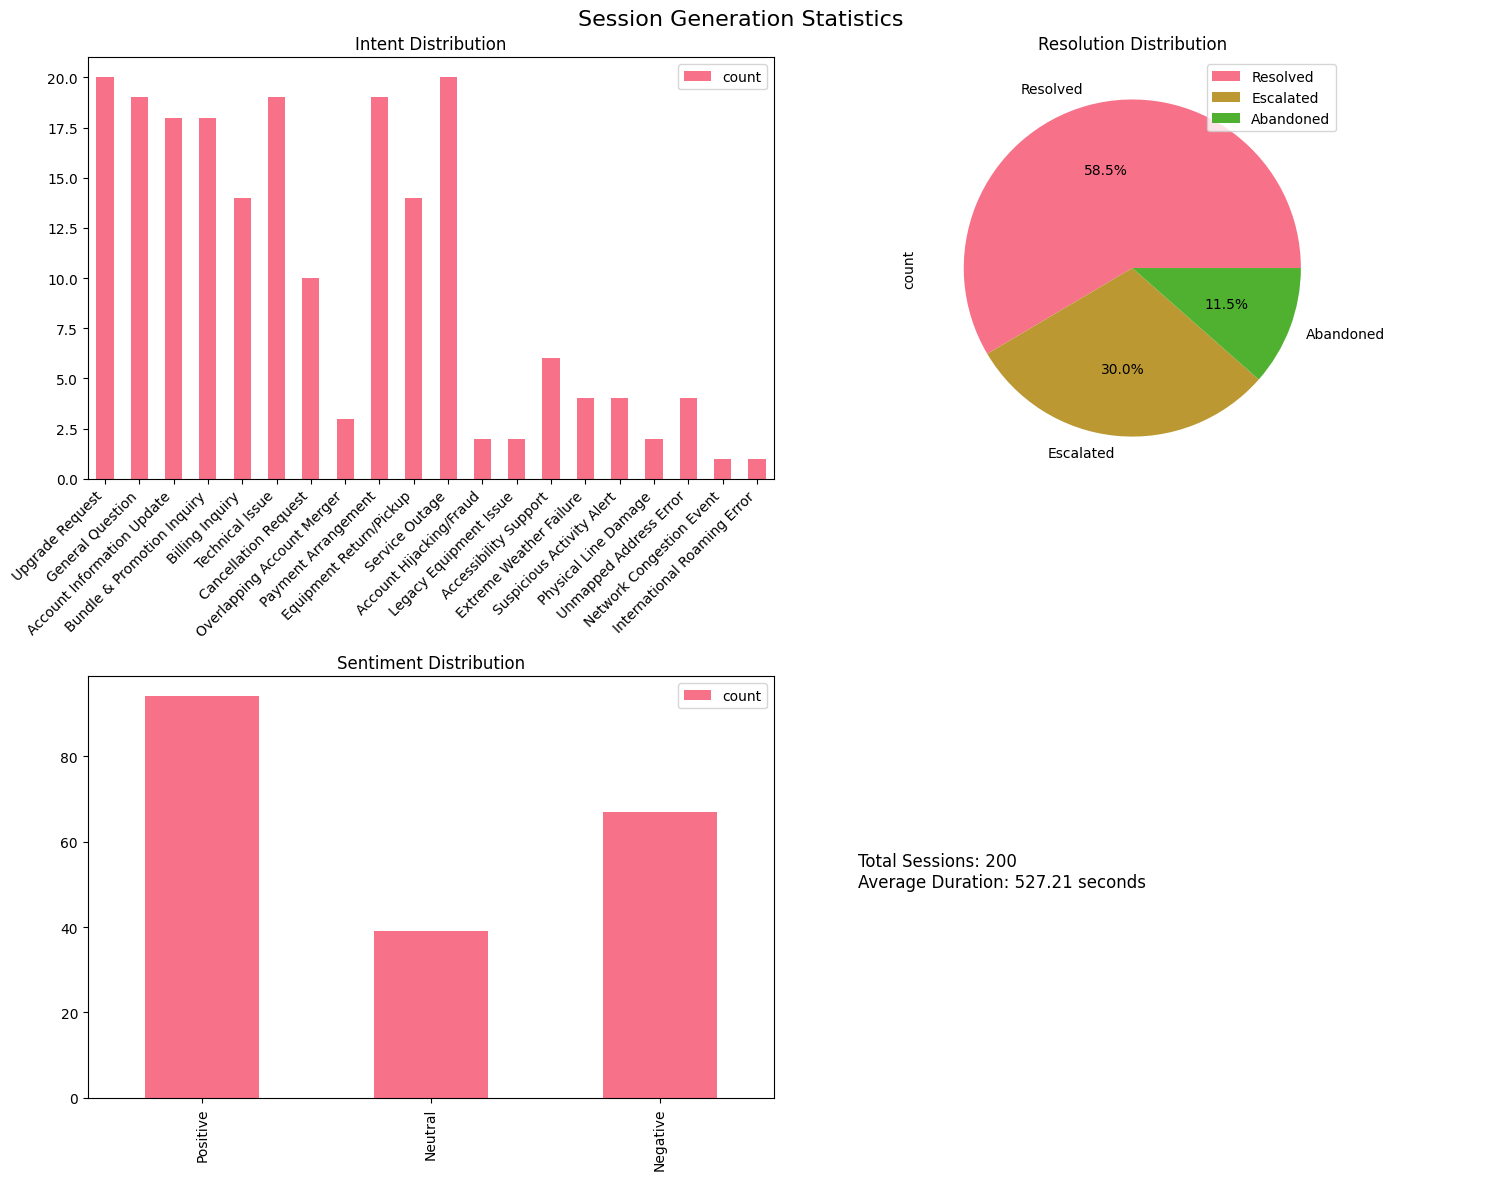

In [24]:
# Display statistics
print("\nGeneration Statistics:")
print(json.dumps(generator.get_statistics(), indent=2))

# Plot statistics
generator.plot_statistics()

## 3.B. **Chatbot Sessions** – FUNCTION TO LOOP DATE RANGES

In [20]:
#Function that loops random_seed & date_ranges for sequential data creation
def loop_session_generator(n_ses, date_dict):
  #empty list to capture session outputs
  output_list = []

  for k,v in date_dict.items():
    print(f"GENERATING SEED: {k}; DATE RANGE {v}")
    #Step 1. Instantiate Gen Class object
    sess_gen = FakeSessionDataGenerator(openai_api_key=OPENAI_API_KEY, gpt_model="gpt-4o", random_seed=k) #use the key to set random seed num

    #Step 2. Generate Fake Ssession output
    sess_output = sess_gen.generate_multiple_sessions(num_sessions=n_ses, date_range=v) #use gen class & the dict value to set date range

    output_list.append(sess_output)

  return output_list




In [21]:
#Use the date range dict to easily loop through generator
date_dict_2024 = {
    #1: ["1/1/2024", "1/31/2024"],
    2: ["2/1/2024", "2/29/2024"],  # 2024 is a leap year
    3: ["3/1/2024", "3/31/2024"],
    4: ["4/1/2024", "4/30/2024"],
    5: ["5/1/2024", "5/31/2024"],
    6: ["6/1/2024", "6/30/2024"],
    7: ["7/1/2024", "7/31/2024"],
    8: ["8/1/2024", "8/31/2024"],
    9: ["9/1/2024", "9/30/2024"],
    10: ["10/1/2024", "10/31/2024"],
    11: ["11/1/2024", "11/30/2024"],
    12: ["12/1/2024", "12/31/2024"]
}

date_dict_2024

{2: ['2/1/2024', '2/29/2024'],
 3: ['3/1/2024', '3/31/2024'],
 4: ['4/1/2024', '4/30/2024'],
 5: ['5/1/2024', '5/31/2024'],
 6: ['6/1/2024', '6/30/2024'],
 7: ['7/1/2024', '7/31/2024'],
 8: ['8/1/2024', '8/31/2024'],
 9: ['9/1/2024', '9/30/2024'],
 10: ['10/1/2024', '10/31/2024'],
 11: ['11/1/2024', '11/30/2024'],
 12: ['12/1/2024', '12/31/2024']}

In [22]:
%%time
#Use function to loop and generate data
session_dict_list = loop_session_generator(n_ses=20, date_dict=date_dict_2024)

session_dict_list

GENERATING SEED: 2; DATE RANGE ['2/1/2024', '2/29/2024']
GENERATING SEED: 3; DATE RANGE ['3/1/2024', '3/31/2024']
GENERATING SEED: 4; DATE RANGE ['4/1/2024', '4/30/2024']
GENERATING SEED: 5; DATE RANGE ['5/1/2024', '5/31/2024']
GENERATING SEED: 6; DATE RANGE ['6/1/2024', '6/30/2024']
GENERATING SEED: 7; DATE RANGE ['7/1/2024', '7/31/2024']
GENERATING SEED: 8; DATE RANGE ['8/1/2024', '8/31/2024']
GENERATING SEED: 9; DATE RANGE ['9/1/2024', '9/30/2024']
GENERATING SEED: 10; DATE RANGE ['10/1/2024', '10/31/2024']
GENERATING SEED: 11; DATE RANGE ['11/1/2024', '11/30/2024']
GENERATING SEED: 12; DATE RANGE ['12/1/2024', '12/31/2024']
CPU times: user 7.04 s, sys: 814 ms, total: 7.85 s
Wall time: 33min 2s


[[{'session_id': 'IVR-20250306-56371',
   'customer_id': 'CUST_479465',
   'call_start_time': '2024-02-29T18:28:01',
   'call_end_time': '2024-02-29T18:37:50',
   'call_duration_sec': 589,
   'conversation': [{'turn_number': 1,
     'timestamp': '2025-03-06T03:13:39.890897Z',
     'speaker': 'Chatbot',
     'text': 'Thank you for calling Spectrum Customer Service. How can I assist you today?',
     'intent_detected': None},
    {'turn_number': 2,
     'timestamp': '2025-03-06T03:13:52.890897Z',
     'speaker': 'Customer',
     'text': 'Hi there! I noticed some physical damage to the line outside my house, and I think it might be affecting my service. Could you help with that?',
     'intent_detected': {'intent_name': 'Bundle & Promotion Inquiry',
      'confidence_score': 0.7103629881035474}},
    {'turn_number': 3,
     'timestamp': '2025-03-06T03:14:02.890897Z',
     'speaker': 'Chatbot',
     'text': "I'm sorry to hear about the damage. Let's get this sorted out for you. Could you p

# 4. LOAD AND TRANSFORM - Session Batch JSON Files

In [26]:
import os
import json
import ast
import pandas as pd
from typing import List, Dict, Any
from glob import glob
from datetime import datetime
from IPython.display import display

class FakeSessionDataETL:
    def __init__(self, folder_path: str):
        """
        Initialize the ETL object with the base folder path.
        Creates the 'session_etls' folder if it does not exist.
        """
        self.folder_path = folder_path
        self.session_batch_folder = os.path.join(self.folder_path, "session_batch_files")
        self.session_etls_folder = os.path.join(self.folder_path, "session_etls")
        os.makedirs(self.session_etls_folder, exist_ok=True)
        self.df = None  # Will hold raw session data


    ## PART 1 - RAW SESSIONS ##
    def load_json_file(self, file_path: str) -> List[Dict[str, Any]]:
        """
        Load a single JSON file containing session data.
        """
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                return json.load(f)
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            return []

    def load_all_session_files(self) -> pd.DataFrame:
        """
        Load all JSON files from the session_batch_files directory into a DataFrame.
        Each session record is annotated with a 'source_file' column that contains the JSON file's name.
        """
        # Get all JSON files in the session batch folder
        json_files = glob(os.path.join(self.session_batch_folder, "*.json"))
        if not json_files:
            raise FileNotFoundError(f"No JSON files found in {self.session_batch_folder}")

        all_sessions = []
        for file_path in json_files:
            sessions = self.load_json_file(file_path)
            # Add the source file name to each session record
            for session in sessions:
                session["source_file"] = os.path.basename(file_path)
            all_sessions.extend(sessions)
            print(f"Loaded {len(sessions)} sessions from {os.path.basename(file_path)}")

        if not all_sessions:
            raise ValueError("No session data was loaded from the JSON files")

        # Convert list of dictionaries to DataFrame
        self.df = pd.DataFrame(all_sessions)

        # Rearrange columns so that "source_file" is the last column
        cols = [col for col in self.df.columns if col != "source_file"] + ["source_file"]
        self.df = self.df[cols]

        # Print metadata
        print(f"\nTotal sessions loaded: {len(self.df)}")
        print(f"DataFrame shape: {self.df.shape}")
        print("\nColumns in the DataFrame:")
        for col in self.df.columns:
            print(f"- {col}")

        return self.df

    def save_to_excel(self) -> None:
        """
        Save the raw session DataFrame to the 'session_etls' folder as an Excel file with the format:
        "01_raw_session_data_batch{datetimestamp}.xlsx"
        """
        if self.df is None:
            raise ValueError("DataFrame is empty. Please load session data first.")
        datetimestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        output_filename = f"01_raw_session_data_batch{datetimestamp}.xlsx"
        output_filepath = os.path.join(self.session_etls_folder, output_filename)
        self.df.to_excel(output_filepath, index=False)
        print(f"\nRaw session data saved as Excel file at: {output_filepath}")

    def run_etl(self) -> pd.DataFrame:
        """
        Perform the ETL process: load JSON files and save the raw session DataFrame as an Excel file.
        Returns the raw session DataFrame.
        """
        self.load_all_session_files()
        self.save_to_excel()
        return self.df


    ## PART 2 - CONVERSATION TABLE ##
    def expand_conversation_data(self, df_raw: pd.DataFrame = None) -> pd.DataFrame:
        """
        Transform raw session data into a conversation-level DataFrame.

        Args:
            df_raw: Raw session DataFrame with 'conversation' column containing JSON strings.
                    If None, uses the raw session data loaded into self.df.

        Returns:
            DataFrame with expanded conversation data, one row per conversation turn.
        """
        if df_raw is None:
            if self.df is None:
                raise ValueError("Raw session data is not loaded. Please run the ETL process for raw sessions first.")
            df_raw = self.df

        conversation_rows = []

        # Process each session
        for _, row in df_raw.iterrows():
            session_id = row['session_id']
            customer_id = row['customer_id']

            # Convert conversation string to list if it's a string
            conversation = row['conversation']
            if isinstance(conversation, str):
                try:
                    conversation = json.loads(conversation)
                except json.JSONDecodeError:
                    try:
                        conversation = ast.literal_eval(conversation)
                    except:
                        print(f"Warning: Could not parse conversation for session {session_id}")
                        continue

            # Process each turn in the conversation
            if isinstance(conversation, list):
                for turn in conversation:
                    if isinstance(turn, dict):
                        # Create a new row with session and customer IDs
                        turn_data = {
                            'session_id': session_id,
                            'customer_id': customer_id
                        }

                        # Handle nested intent_detected dictionary
                        if 'intent_detected' in turn and isinstance(turn['intent_detected'], (str, dict)):
                            intent_dict = turn['intent_detected']
                            # Convert string to dict if needed
                            if isinstance(intent_dict, str):
                                try:
                                    intent_dict = json.loads(intent_dict)
                                except json.JSONDecodeError:
                                    try:
                                        intent_dict = ast.literal_eval(intent_dict)
                                    except:
                                        intent_dict = {'intent_name': None, 'confidence_score': None}

                            # Extract intent details and set boolean flag
                            turn_data['intent_name'] = intent_dict.get('intent_name')
                            turn_data['confidence_score'] = intent_dict.get('confidence_score')
                            turn_data['intent_detected'] = bool(intent_dict.get('intent_name'))

                            # Remove the original intent_detected field
                            turn.pop('intent_detected', None)
                        else:
                            # Set default values if no intent was detected
                            turn_data['intent_name'] = None
                            turn_data['confidence_score'] = None
                            turn_data['intent_detected'] = False

                        # Add all remaining turn data
                        turn_data.update(turn)
                        conversation_rows.append(turn_data)

        # Convert to DataFrame
        df_conversations = pd.DataFrame(conversation_rows)

        # Organize columns: session_id, customer_id, other columns, intent columns
        base_cols = ['session_id', 'customer_id']
        intent_cols = ['intent_detected', 'intent_name', 'confidence_score']
        other_cols = [col for col in df_conversations.columns if col not in base_cols + intent_cols]

        # Reorder columns
        df_conversations = df_conversations[base_cols + other_cols + intent_cols]

        return df_conversations

    def save_conversation_data(self, df_conversations: pd.DataFrame) -> str:
        """
        Save conversation DataFrame to an Excel file with timestamp.

        Args:
            df_conversations: DataFrame with conversation data.

        Returns:
            The path of the saved Excel file.
        """
        # Use the session_etls folder as the base directory
        conv_dir = self.session_etls_folder
        os.makedirs(conv_dir, exist_ok=True)

        # Generate timestamp and filename
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        excel_filename = f"02_conversation_data_batch{timestamp}.xlsx"
        excel_path = os.path.join(conv_dir, excel_filename)

        try:
            df_conversations.to_excel(excel_path, index=False, engine='openpyxl')
            print(f"\nConversation data successfully saved to: {excel_path}")
            return excel_path
        except Exception as e:
            print(f"Error saving conversation Excel file: {e}")
            raise

    def process_session_data(self) -> pd.DataFrame:
        """
        Process raw session data into conversation-level data and save as an Excel file.
        This method uses the raw session data loaded in self.df.

        Returns:
            The conversation-level DataFrame.
        """
        if self.df is None:
            raise ValueError("Raw session data is not loaded. Please run the ETL process for raw sessions first.")

        print(f"\nLoaded raw data shape: {self.df.shape}")

        # Transform to conversation level
        df_conversations = self.expand_conversation_data()
        print(f"\nTransformed conversation data shape: {df_conversations.shape}")

        # Print column information
        print("\nColumns in conversation DataFrame:")
        for col in df_conversations.columns:
            print(f"- {col}")

        # Save conversation data to Excel
        self.save_conversation_data(df_conversations)

        return df_conversations

# Example usage in a Jupyter Notebook:
base_folder = "/content/drive/MyDrive/Job Research/2025/B - Projects/B2 - Spectrum_IVR_Chatbot_Dashboard/"
etl = FakeSessionDataETL(base_folder)

try:
    # PART 1 - RAW SESSION DATA
    df_raw = etl.run_etl()
    print("\nFirst few rows of the raw session DataFrame:")
    display(df_raw.head())

    # PART 2 - CONVERSATION TABLE
    df_conversations = etl.process_session_data()
    print("\nFirst few rows of the conversation DataFrame:")
    display(df_conversations.head())

except Exception as e:
    print(f"Error: {e}")


Loaded 100 sessions from fake_ivr_sessions_batch20250306_024619.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_031319.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_031614.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_031847.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_032136.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_032441.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_032847.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_033228.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_033559.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_033859.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_034146.json
Loaded 20 sessions from fake_ivr_sessions_batch20250306_034415.json
Loaded 100 sessions from fake_ivr_sessions_batch20250306_034951.json

Total sessions loaded: 420
DataFrame shape: (420, 15)

Columns in the DataFrame:
- session_id
- customer_id
- cal

,session_id,customer_id,call_start_time,call_end_time,call_duration_sec,conversation,initial_intent,resolution_status,escalation_flag,customer_sentiment,system_error_flag,ivr_outcome_code,topic_type,topic_name,source_file
0,IVR-20250306-70241,CUST_403858,2024-01-28T22:03:53,2024-01-28T22:17:50,837,"[{'turn_number': 1, 'timestamp': '2025-03-06T0...",Upgrade Request,Resolved,False,Positive,False,UPGRADE-REQUEST,Common,Upgrade Request,fake_ivr_sessions_batch20250306_024619.json
1,IVR-20250306-94824,CUST_278624,2024-01-06T00:13:26,2024-01-06T00:19:50,384,"[{'turn_number': 1, 'timestamp': '2025-03-06T0...",General Question,Resolved,False,Neutral,False,GENERAL-QUESTION,Common,General Question,fake_ivr_sessions_batch20250306_024619.json
2,IVR-20250306-98226,CUST_173875,2024-01-04T00:15:54,2024-01-04T00:23:41,467,"[{'turn_number': 1, 'timestamp': '2025-03-06T0...",Account Information Update,Resolved,False,Negative,False,ACCOUNT-INFORMATION-UPDATE,Common,Account Information Update,fake_ivr_sessions_batch20250306_024619.json
3,IVR-20250306-92676,CUST_936565,2024-01-21T21:46:07,2024-01-21T22:00:11,844,"[{'turn_number': 1, 'timestamp': '2025-03-06T0...",Upgrade Request,Escalated,True,Neutral,False,UPGRADE-REQUEST,Common,Upgrade Request,fake_ivr_sessions_batch20250306_024619.json
4,IVR-20250306-87517,CUST_303548,2024-01-16T20:33:01,2024-01-16T20:41:04,483,"[{'turn_number': 1, 'timestamp': '2025-03-06T0...",Bundle & Promotion Inquiry,Escalated,True,Negative,False,BUNDLE-&-PROMOTION-INQUIRY,Common,Bundle & Promotion Inquiry,fake_ivr_sessions_batch20250306_024619.json



Loaded raw data shape: (420, 15)

Transformed conversation data shape: (5393, 9)

Columns in conversation DataFrame:
- session_id
- customer_id
- turn_number
- timestamp
- speaker
- text
- intent_detected
- intent_name
- confidence_score

Conversation data successfully saved to: /content/drive/MyDrive/Job Research/2025/B - Projects/B2 - Spectrum_IVR_Chatbot_Dashboard/session_etls/02_conversation_data_batch20250306_043954.xlsx

First few rows of the conversation DataFrame:


,session_id,customer_id,turn_number,timestamp,speaker,text,intent_detected,intent_name,confidence_score
0,IVR-20250306-70241,CUST_403858,1,2025-03-06T02:46:38.806598Z,Chatbot,Hello! Welcome to Spectrum Customer Service. H...,None,None,NaN
1,IVR-20250306-70241,CUST_403858,2,2025-03-06T02:46:46.806598Z,Customer,Hi there! I'm interested in upgrading my curre...,True,Upgrade Request,0.825502
2,IVR-20250306-70241,CUST_403858,3,2025-03-06T02:46:51.806598Z,Chatbot,Absolutely! I'd be happy to assist you with up...,None,None,NaN
3,IVR-20250306-70241,CUST_403858,4,2025-03-06T02:47:10.806598Z,Customer,"Sure, my account number is 123456789.",True,Payment Arrangement,0.871434
4,IVR-20250306-70241,CUST_403858,5,2025-03-06T02:47:18.806598Z,Chatbot,Thank you for that information! Let's see what...,None,None,NaN
